# Exploratory Data Analysis

## Import Packages

In [31]:
!pip install dmba

     |████████████████████████████████| 11.8 MB 4.6 MB/s 


In [32]:
pip install scikit-plot

In [33]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from matplotlib.pyplot import figure
from xgboost import plot_tree, plot_importance
from sklearn.model_selection import train_test_split
import scikitplot as skplt # Package for ROC vurve
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, precision_recall_curve

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load Data

**Dataset:** [Company Bankruptcy Prediction](https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction)

In [34]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("data.csv") 
df.head()

Saving data.csv to data (1).csv


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Basic Data Information

Check the shape of data, which is the dimensions of a matrix or array

In [4]:
df.shape

(6819, 96)

Check statistical variables of the data frame to observe the range, size, fluctuation trend, etc. of this series of data

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Calculate the amount of bankrupt companies and non-bankrupt companies seperately in the data set, where 1 represents for bankrupty and 0 for non-bankrupty.

0    6599
1     220
Name: Bankrupt?, dtype: int64
There are 220 companines are bankrupted.
There are 6599 companines are not bankrupted.


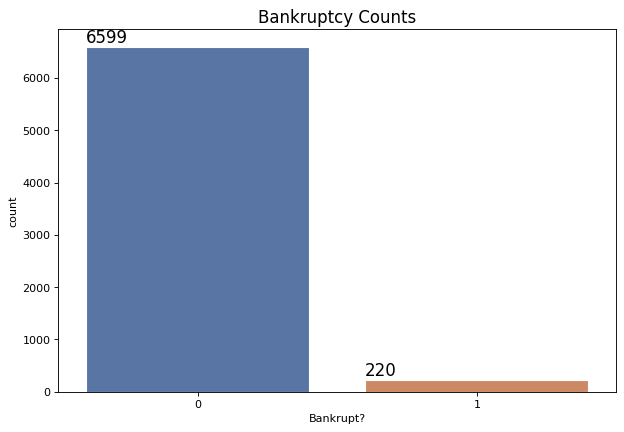

In [6]:
fig,ax = plt.subplots(figsize=(9,6), dpi=80)
print(df['Bankrupt?'].value_counts())
n_bankrupt = pd.DataFrame(df[df['Bankrupt?']==1].count())
n_nonbankrupt = pd.DataFrame(df[df['Bankrupt?']==0].count())
print("There are %d companines are bankrupted." %n_bankrupt[0][1])
print("There are %d companines are not bankrupted." %n_nonbankrupt[0][1])
sns.set_theme(style='whitegrid')
sns.countplot(data=df, x='Bankrupt?')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+80), color='black', size=15)
plt.title('Bankruptcy Counts', fontsize = 15)
plt.show()

Calculate the proportion of bankrupt and non-bankrupt companies in the data set to basically judge the reliability and deviation of the data

In [7]:
labels = df['Bankrupt?'].unique()
values = df['Bankrupt?'].value_counts().sort_values(ascending = True)

colors = ['#DAF8FF','#8F9EA0']
trace = [go.Pie(
    labels=labels,
    values=values,
    hole=.5,
    marker=dict(colors=colors, line=dict(color = '#000000', width = 2)))]
layout = go.Layout(
    title = 'Bankrupt Distribution'
)
fig = go.Figure(data=trace, layout=layout)
fig.show()

Through the above histogram and pie chart, we can preliminarily determine that there is a certain class imbalance in the data. In the follow-up part, we will further study and process the data in the 'class imbalanc' part.

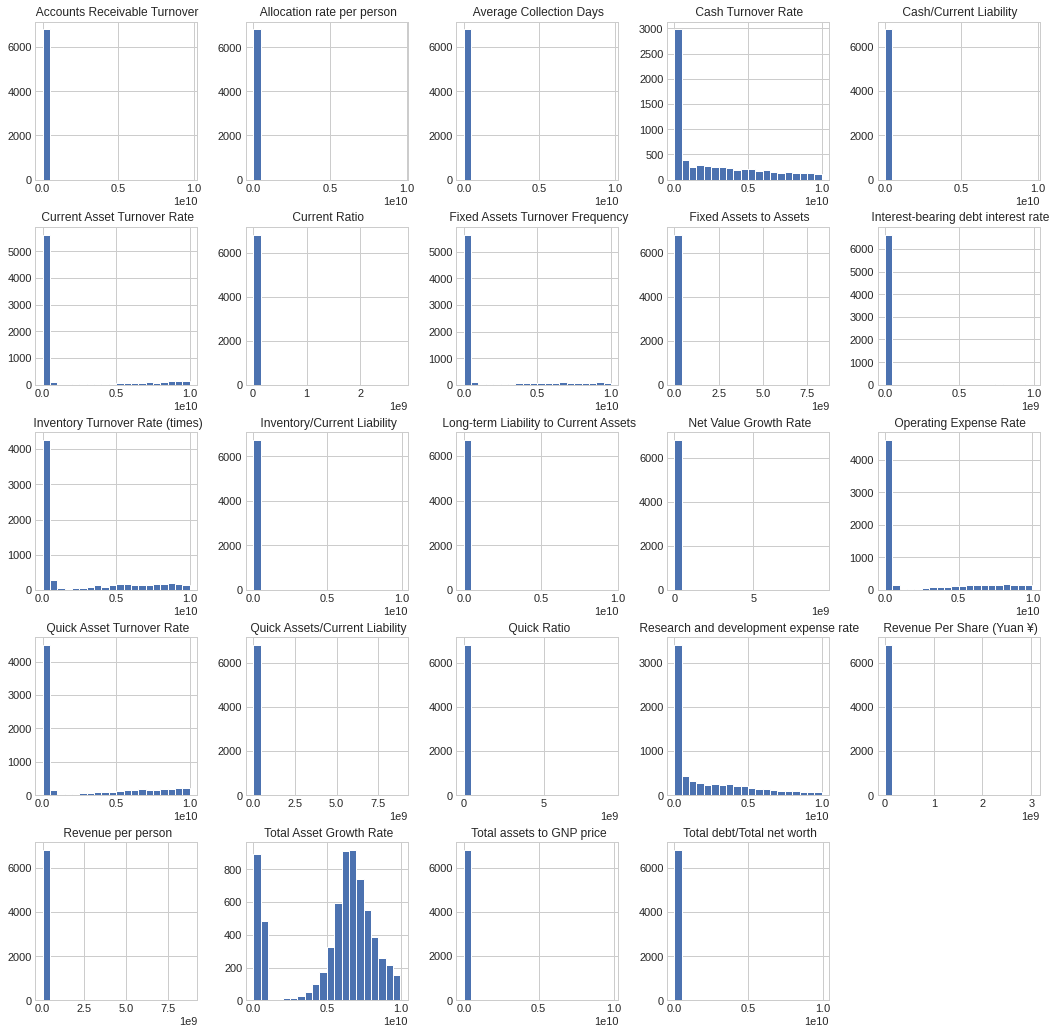

In [8]:
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (df[col].max()<=1) & (df[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=df.drop(['Bankrupt?'],axis=1))
non_fractional_columns = df.drop(['Bankrupt?'],axis=1).columns.difference(fractional_columns)
plt.style.use('seaborn-whitegrid')

df[non_fractional_columns].hist(bins = 20, figsize = (18,18), color = 'b')
plt.show()

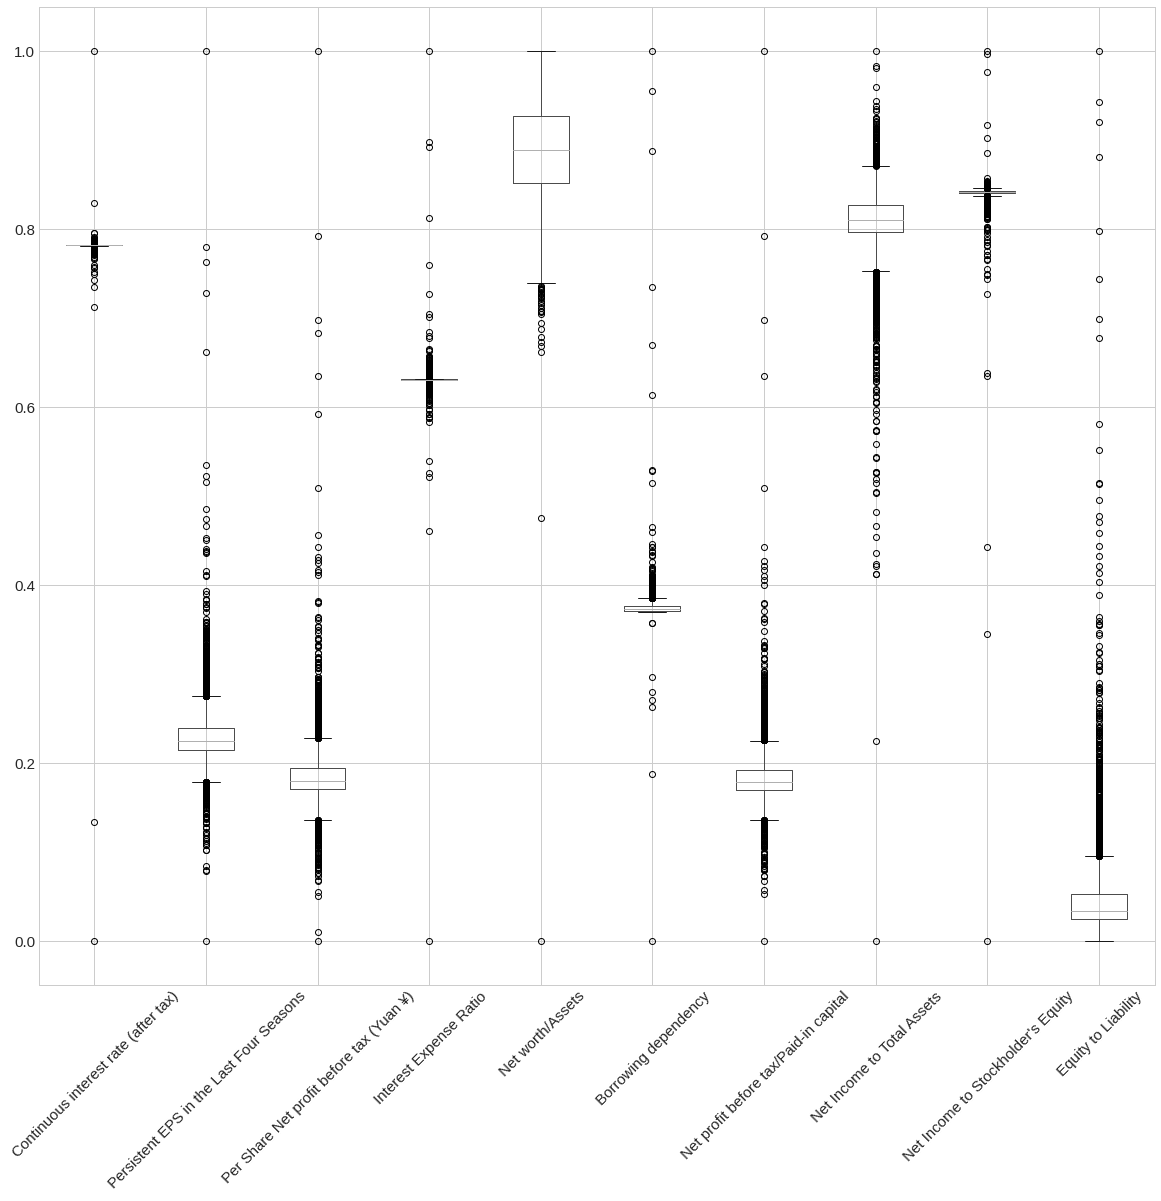

In [9]:
top = df[[' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Interest Expense Ratio',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder\'s Equity', ' Equity to Liability']]
top.boxplot(figsize=(20,18), rot=45, fontsize=15)

## Missing Values

In [10]:
missing_value = df.isna().sum(axis = 1).reset_index()
missing_value.columns = ['Variables','Missing Value']
missing_value = missing_value.sort_values("Missing Value",ascending = False)
if ((missing_value["Missing Value"] > 0 ).sum()) == 0:
    print("There is no missing values in dataset")
    #Randomly select ten rows to ensure that there are no missing values in data
    print(missing_value.sample(10)) 
else:
  missing_value

There is no missing values in dataset
      Variables  Missing Value
5176       5176              0
1544       1544              0
5878       5878              0
2756       2756              0
2146       2146              0
4281       4281              0
2850       2850              0
6679       6679              0
24           24              0
3500       3500              0


## Outliers Removal

In [11]:
X = df.drop(["Bankrupt?"],axis=1)
y = df["Bankrupt?"].values

All outliers have been fully handled. 
Processing rules: 
Outliers larger than up quartile are replaced with up quartile values
outliers smaller than low quartile are replaced with low quartile values.


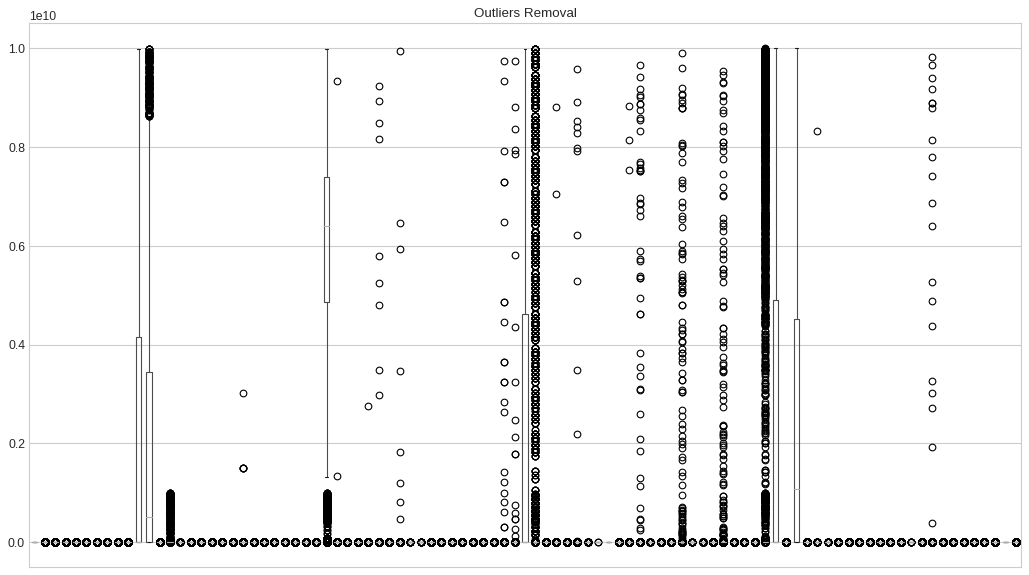

In [12]:
def box_quartile(x):
    x = sorted(x)
    Q1,Q3 = np.percentile(x,[25,75])
    IQR = Q3 - Q1
    low = Q1 - IQR * 1.5
    up = Q3 + IQR * 1.5
    return low,up

def rm_outlier(df):
    for i in df.columns:
        low,up = box_quartile(df[i])
        df[i] = np.where(df[i] > up, up, df[i])
        df[i] = np.where(df[i] < low, low, df[i])
        return df
    
X = rm_outlier(X)
figure(figsize=(16, 9), dpi=80)
X.boxplot(vert=True,patch_artist=False)
plt.xticks([])
plt.title('Outliers Removal')
print("All outliers have been fully handled. ")
print("Processing rules: \nOutliers larger than up quartile are replaced with up quartile values")
print("outliers smaller than low quartile are replaced with low quartile values.")

## Correlation

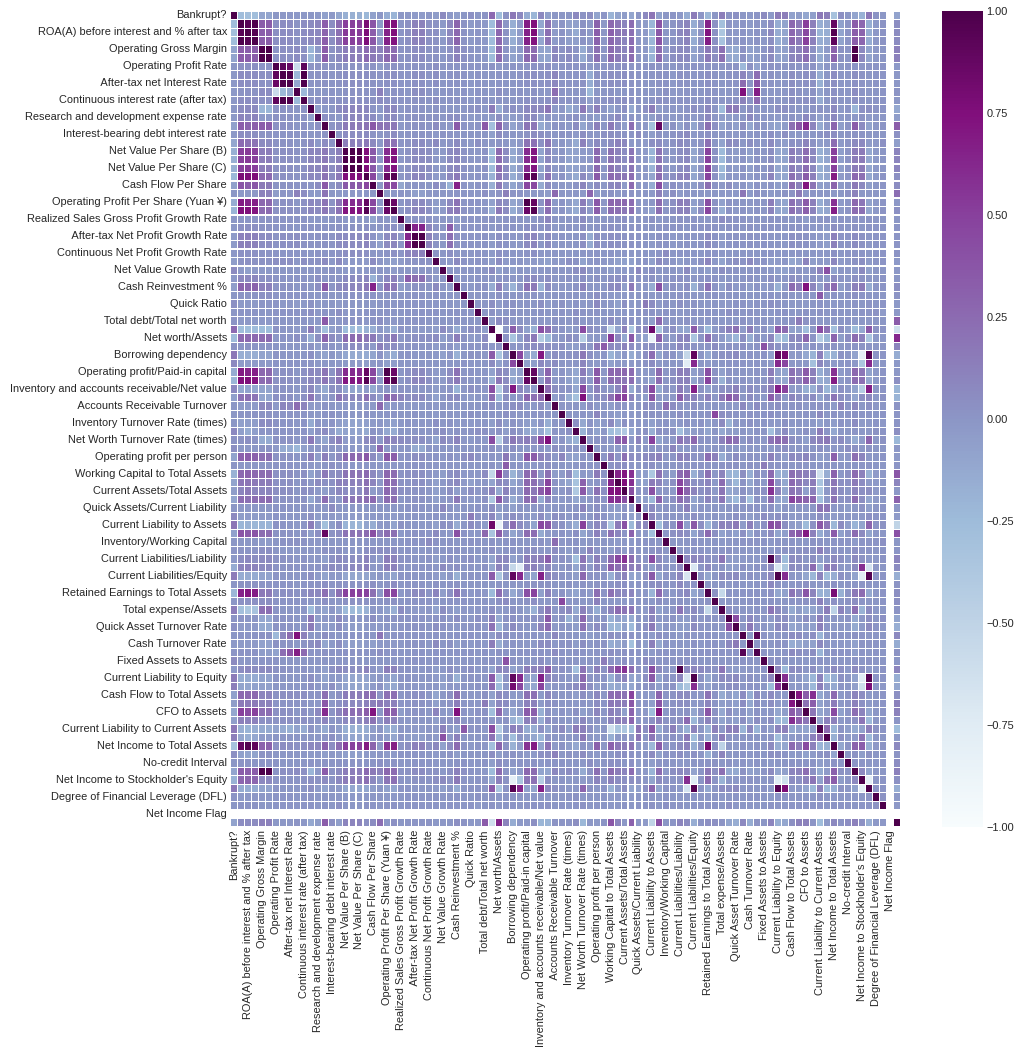

In [13]:
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), ax = ax, cmap = 'BuPu', linewidth = 0.1)

## Class Imbalance

In [14]:
cor = df.corr().round(6).abs()
upper_tri = np.triu_indices(n=cor.shape[0])
lower_triangle = np.tril_indices(n=cor.shape[0],k=0)

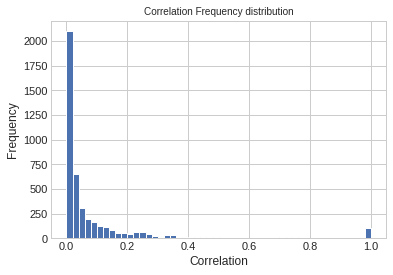

In [15]:
def corr_freq(df):
    cor = df.corr().round(4).abs()
    lower_triangle = np.tril_indices(n=cor.shape[0],k=0)
    cor_np = cor.to_numpy()[lower_triangle]
    return cor_np

plt.hist(x=corr_freq(X), bins=50, range=[0, 1])
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.title("Correlation Frequency distribution", fontsize = 10)
plt.show()

Most of the features are uncorrelated with each other but there are also few of them correlated so that we could use PCA to reduce the dimension.

## Oversampling

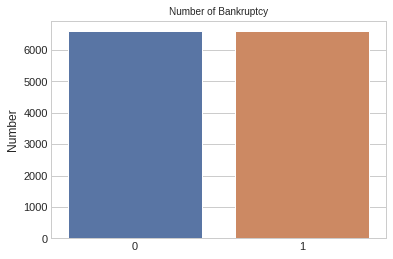

In [16]:
# using smote oversampling to correct unbalanced data
smote = SMOTE()
X,y=smote.fit_resample(X,y)
sns.countplot(x=y)
plt.ylabel("Number")
plt.title('Number of Bankruptcy', fontsize = 10)
plt.show()

# Dimension Reduction

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
#Split data into 75:25
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25,random_state=42)
# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
# Make an instance of the Model
pca = PCA(0.999999)

In [18]:
x_train = pca.fit_transform(X_train)
x_valid = pca.fit_transform(X_valid)
pcsSummary_scale = pd.DataFrame({'Explained Variance': pca.explained_variance_,
                           'Proportion of variance ': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcsSummary_scale = pcsSummary_scale.transpose()
pcsSummary_scale.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_scale.columns) + 1)]
pcsSummary_scale

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86
Explained Variance,15.917299,6.826342,6.621359,4.727272,4.084244,2.937694,2.794098,2.640232,2.168225,2.074372,...,0.005113,0.003578,0.001105,0.000963,0.000884,0.000697,0.000452,0.000384,0.000348,0.000227
Proportion of variance,0.169282,0.072599,0.070419,0.050275,0.043436,0.031243,0.029715,0.028079,0.023059,0.022061,...,0.000054,0.000038,0.000012,0.000010,0.000009,0.000007,0.000005,0.000004,0.000004,0.000002
Cumulative proportion,0.169282,0.241880,0.312299,0.362574,0.406010,0.437253,0.466968,0.495047,0.518106,0.540168,...,0.999907,0.999945,0.999957,0.999967,0.999977,0.999984,0.999989,0.999993,0.999997,0.999999


In [19]:
pcsComponents_scale = pd.DataFrame(pca.components_.transpose(), columns=pcsSummary_scale.columns, 
                                index=X.columns)
pcsComponents_scale.iloc[:,:2]

,PC1,PC2
ROA(C) before interest and depreciation before interest,0.214649,-0.057717
ROA(A) before interest and % after tax,0.215237,-0.051489
ROA(B) before interest and depreciation after tax,0.213553,-0.044237
Operating Gross Margin,0.119792,-0.048332
Realized Sales Gross Margin,0.119465,-0.048130
...,...,...
Liability to Equity,-0.106645,-0.243443
Degree of Financial Leverage (DFL),-0.004100,-0.006055
Interest Coverage Ratio (Interest expense to EBIT),0.007490,-0.000320
Net Income Flag,0.000000,0.000000


In [20]:
scores_scale = pd.DataFrame(pca.transform(X_train), columns=['PC{}'.format(i) for i in range(1, len(pcsSummary_scale.columns) + 1)])
scores_scale.iloc[:,:2]

,PC1,PC2
0,2.663269,0.952960
1,4.882881,-0.461731
2,0.759151,-0.663657
3,-3.845602,-0.362116
4,0.912906,-0.171520
...,...,...
9893,-0.358718,0.182905
9894,5.801275,-0.871272
9895,5.701202,-0.897536
9896,7.581496,-1.236881


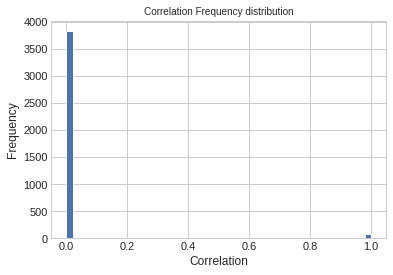

In [21]:
plt.hist(x=corr_freq(pd.DataFrame(x_train)), bins=50, range=[0, 1])
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.title("Correlation Frequency distribution", fontsize = 10)
plt.show()

#Feature Extraction

Text(0, 0.5, 'Mutual Information')

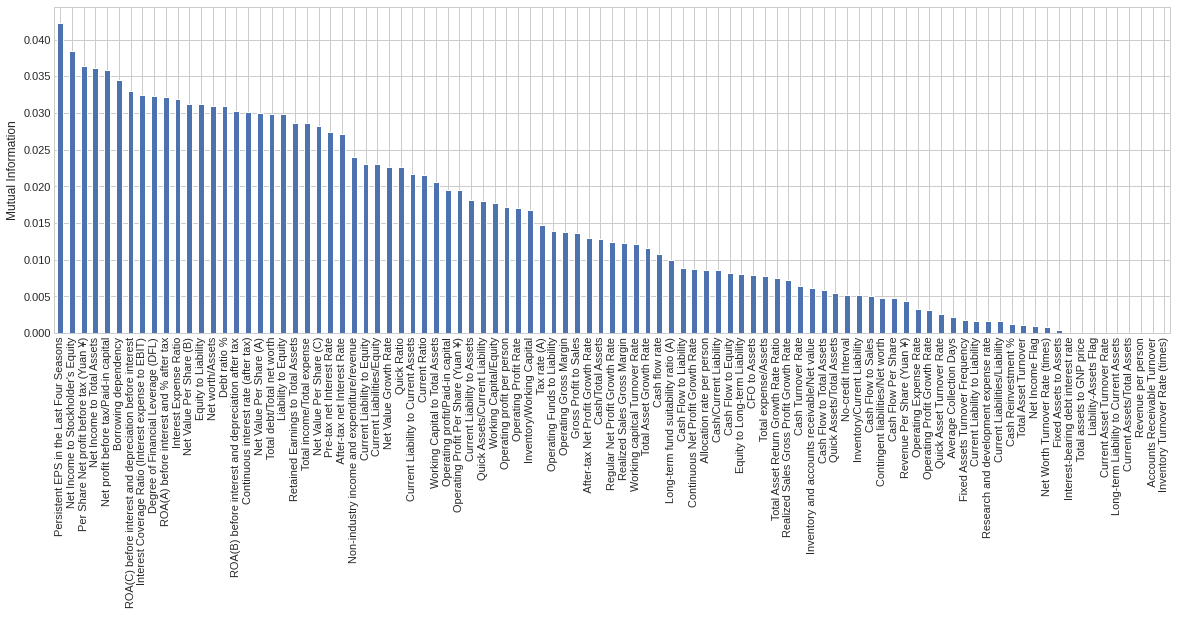

In [22]:
from sklearn.feature_selection import mutual_info_classif
train_X, test_X, train_y, test_y = train_test_split(
    df.drop(labels=['Bankrupt?'], axis=1),
    df['Bankrupt?'],
    test_size=0.25,
    random_state=42)
mi = mutual_info_classif(train_X, train_y)
mi = pd.Series(mi)
mi.index = train_X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [23]:
from sklearn.feature_selection import SelectKBest
sel_ = SelectKBest(mutual_info_classif, k=10).fit(train_X, train_y)
train_X.columns[sel_.get_support()]

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')

In [24]:
train_X = sel_.transform(train_X)
test_X = sel_.transform(test_X)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

# Model Exploration

## Logistic Regression

In [51]:
print("Use Logistic Regression to evaluate on the validation set")
lr = LogisticRegression(penalty = 'none')
lr.fit(train_X, train_y)
pred_y = lr.predict(test_X)
auc = metrics.roc_auc_score(test_y,lr.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use Logistic Regression to evaluate on the validation set
auc: 0.9031781923246027
accuracy score: 0.9689149560117302
Classification Report: 
               precision    recall  f1-score   support

           0      0.971     0.998     0.984      1647
           1      0.692     0.155     0.254        58

    accuracy                          0.969      1705
   macro avg      0.832     0.576     0.619      1705
weighted avg      0.962     0.969     0.959      1705



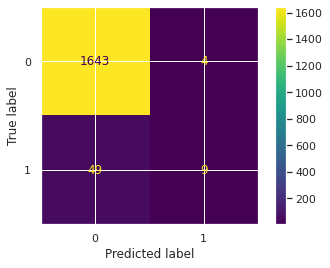

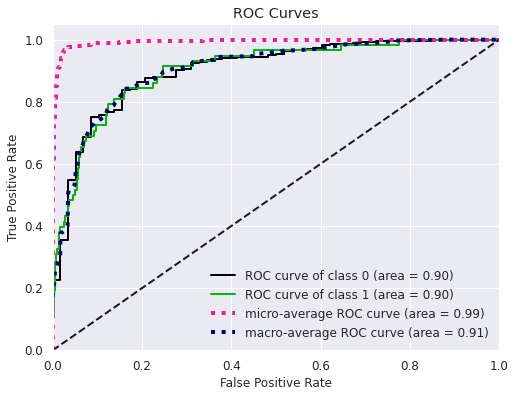

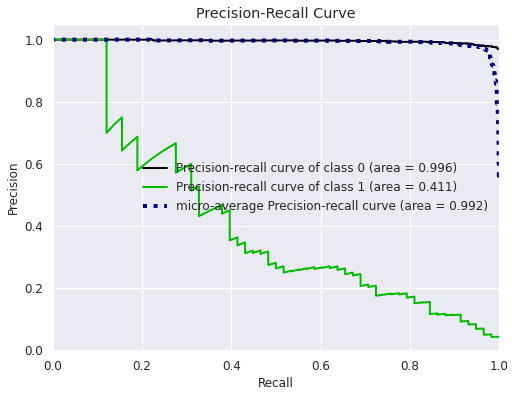

In [37]:
#Confusion Matrix
plot_confusion_matrix(lr, test_X, test_y)
plt.show() 
#ROC
fpr,tpr,thresholds = roc_curve(test_y,lr.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, lr.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, lr.predict_proba(test_X), figsize=(8,6))

## KNN

Text(0, 0.5, 'Error Rate')

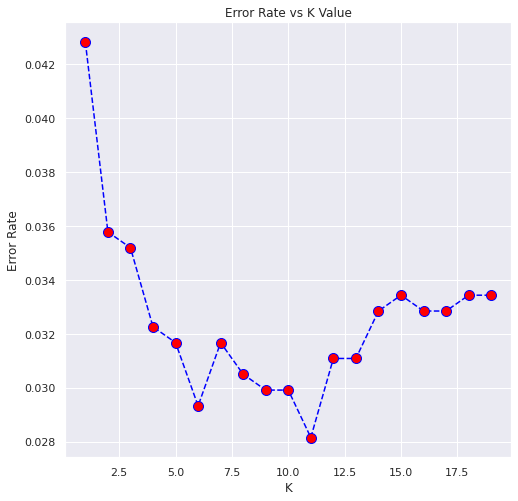

In [38]:
error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_X, train_y)
    pred_knn = knn.predict(test_X)
    error.append(np.mean(pred_knn != test_y))


plt.figure(figsize = (8,8))
plt.plot(range(1,20), error, 
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
print("Use KNN to evaluate on the validation set")
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(train_X, train_y)
pred_y = knn.predict(test_X)
auc = metrics.roc_auc_score(test_y,knn.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use KNN to evaluate on the validation set
auc: 0.8528986872683877
accuracy score: 0.9718475073313783
Classification Report: 
               precision    recall  f1-score   support

           0      0.972     0.999     0.986      1647
           1      0.917     0.190     0.314        58

    accuracy                          0.972      1705
   macro avg      0.944     0.595     0.650      1705
weighted avg      0.970     0.972     0.963      1705



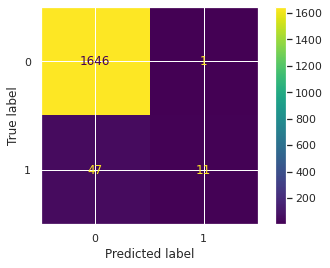

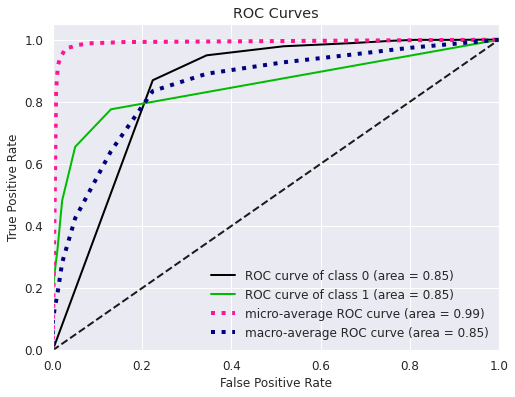

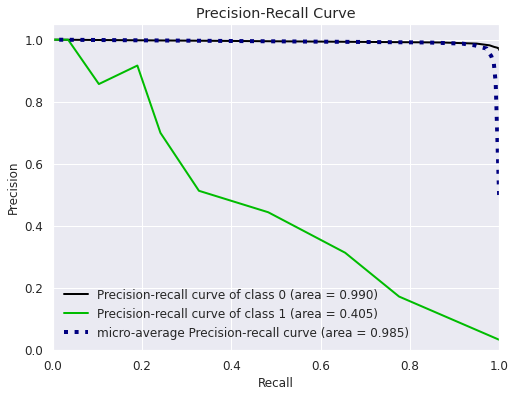

In [40]:
#Confusion Matrix
plot_confusion_matrix(knn, test_X, test_y)
plt.show() 
#ROC
fpr,tpr,thresholds = roc_curve(test_y,knn.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, knn.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, knn.predict_proba(test_X), figsize=(8,6))

## Decision Tee

In [41]:
print("Use DecisionTree to evaluate on the validation set")
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)
pred_y = tree.predict(test_X)
auc = metrics.roc_auc_score(test_y,tree.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use DecisionTree to evaluate on the validation set
auc: 0.6270020727341248
accuracy score: 0.9542521994134897
Classification Report: 
               precision    recall  f1-score   support

           0      0.975     0.978     0.976      1647
           1      0.308     0.276     0.291        58

    accuracy                          0.954      1705
   macro avg      0.641     0.627     0.634      1705
weighted avg      0.952     0.954     0.953      1705



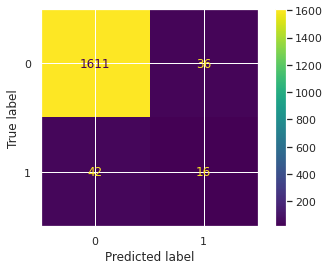

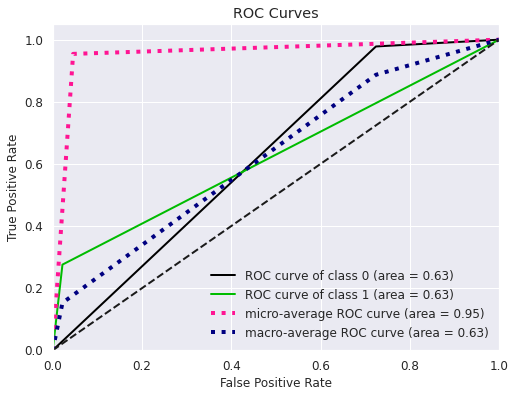

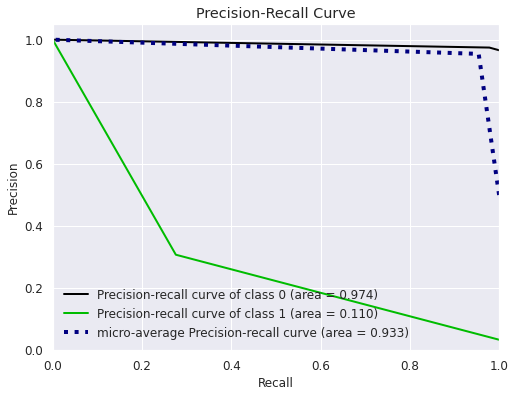

In [42]:
#Confusion Matrix
plot_confusion_matrix(tree, test_X, test_y)
plt.show() 
#ROC
fpr,tpr,thresholds = roc_curve(test_y,tree.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, tree.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, tree.predict_proba(test_X), figsize=(8,6))

## Random Forest

In [43]:
print("Use RandomForest to evaluate on the validation set")
RFC = RandomForestClassifier()
RFC.fit(train_X, train_y)
pred_y = RFC.predict(test_X)
auc = metrics.roc_auc_score(test_y,RFC.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use RandomForest to evaluate on the validation set
auc: 0.9194983564683961
accuracy score: 0.9695014662756598
Classification Report: 
               precision    recall  f1-score   support

           0      0.973     0.996     0.984      1647
           1      0.667     0.207     0.316        58

    accuracy                          0.970      1705
   macro avg      0.820     0.602     0.650      1705
weighted avg      0.962     0.970     0.962      1705



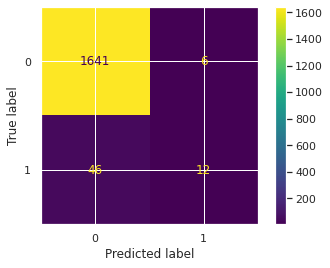

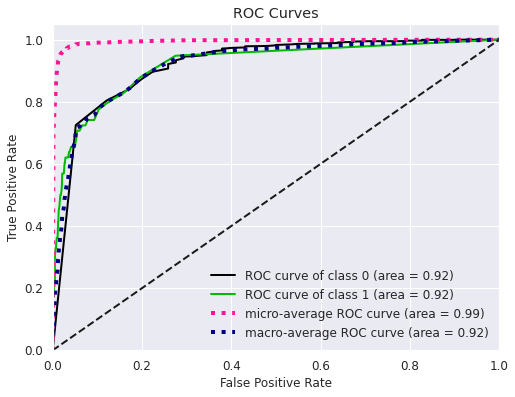

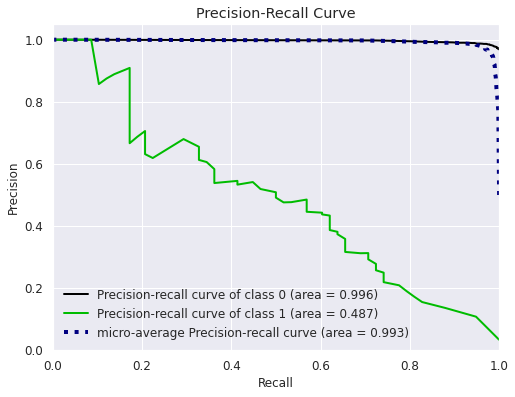

In [44]:
#Confusion Matrix
plot_confusion_matrix(RFC, test_X, test_y)
plt.show() 
#ROC
fpr,tpr,thresholds = roc_curve(test_y,RFC.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, RFC.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, RFC.predict_proba(test_X), figsize=(8,6))

## SVM

In [45]:
print("Use SVM to evaluate on the validation set")
svm = SVC(probability = True, kernel = 'linear')
svm.fit(train_X, train_y)
pred_y = svm.predict(test_X)
auc = metrics.roc_auc_score(test_y,svm.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use SVM to evaluate on the validation set
auc: 0.6644369072294454
accuracy score: 0.9659824046920821
Classification Report: 
               precision    recall  f1-score   support

           0      0.966     1.000     0.983      1647
           1      0.000     0.000     0.000        58

    accuracy                          0.966      1705
   macro avg      0.483     0.500     0.491      1705
weighted avg      0.933     0.966     0.949      1705



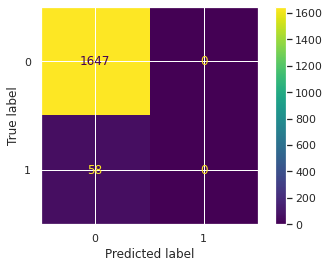

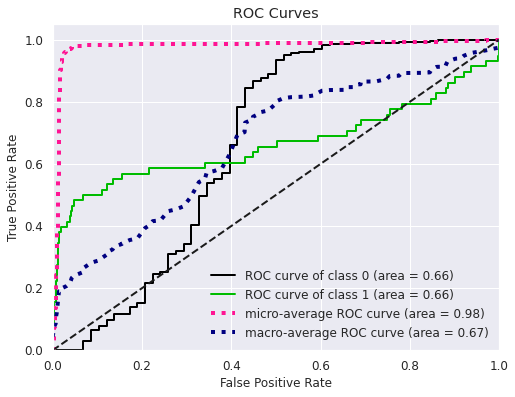

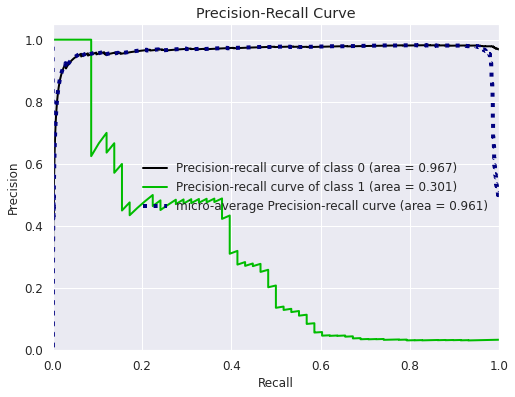

In [46]:
#Confusion Matrix
plot_confusion_matrix(svm, test_X, test_y)
plt.show() 
#ROC
fpr,tpr,thresholds = roc_curve(test_y,svm.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, svm.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, svm.predict_proba(test_X), figsize=(8,6))

## XGBoost


In [47]:
print("Use XGBoost to evaluate on the validation set")
xgboost = XGBClassifier(n_estimators = 1000)
xgboost.fit(train_X, train_y)
pred_y = xgboost.predict(test_X)
auc = metrics.roc_auc_score(test_y,xgboost.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use XGBoost to evaluate on the validation set
auc: 0.9156145970730483
accuracy score: 0.9683284457478006
Classification Report: 
               precision    recall  f1-score   support

           0      0.977     0.990     0.984      1647
           1      0.556     0.345     0.426        58

    accuracy                          0.968      1705
   macro avg      0.766     0.668     0.705      1705
weighted avg      0.963     0.968     0.965      1705



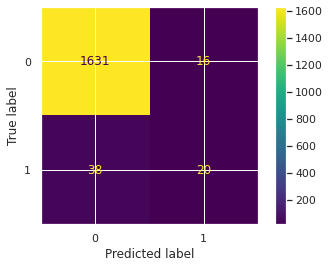

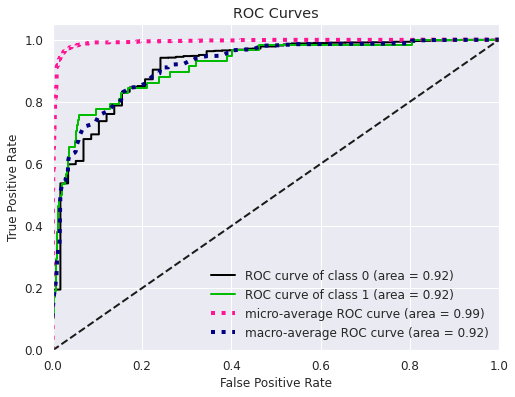

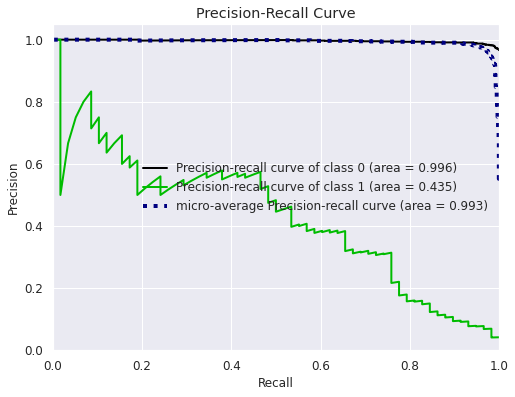

In [48]:
#Confusion Matrix
plot_confusion_matrix(xgboost, test_X, test_y)
plt.show() 
#ROC
fpr,tpr,thresholds = roc_curve(test_y,xgboost.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, xgboost.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, xgboost.predict_proba(test_X), figsize=(8,6))

##Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
print("Use Naive Bayes to evaluate on the validation set")
NB = GaussianNB()
NB.fit(train_X, train_y)
pred_y = NB.predict(test_X)
auc = metrics.roc_auc_score(test_y,NB.predict_proba(test_X)[:,-1])
print("auc:",auc)
acc_score = accuracy_score(test_y, pred_y)
print("accuracy score:",acc_score)
print('Classification Report: \n', classification_report(test_y, pred_y, digits=3))

Use Naive Bayes to evaluate on the validation set
auc: 0.9003726734082867
accuracy score: 0.9560117302052786
Classification Report: 
               precision    recall  f1-score   support

           0      0.978     0.976     0.977      1647
           1      0.361     0.379     0.370        58

    accuracy                          0.956      1705
   macro avg      0.669     0.678     0.673      1705
weighted avg      0.957     0.956     0.957      1705



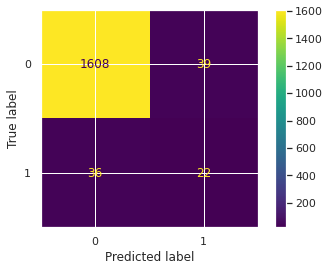

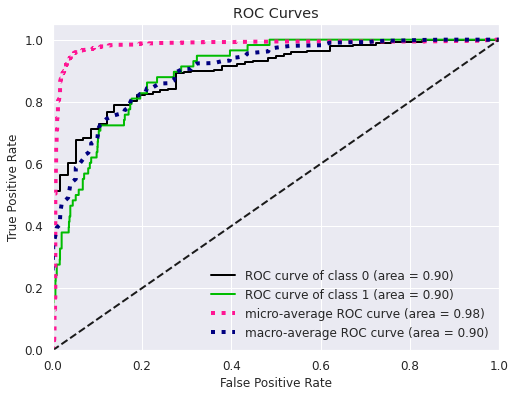

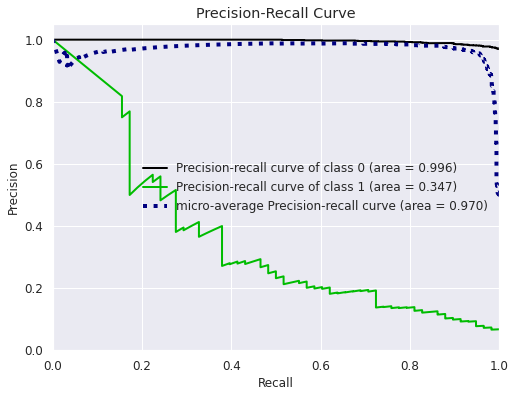

In [50]:
#Confusion Matrix
plot_confusion_matrix(NB, test_X, test_y)
plt.show() 
#ROC
fpr,tpr,thresholds = roc_curve(test_y,NB.predict_proba(test_X)[:,-1])
skplt.metrics.plot_roc(test_y, NB.predict_proba(test_X),figsize=(8,6) )
#PR
skplt.metrics.plot_precision_recall(test_y, NB.predict_proba(test_X), figsize=(8,6))